# debugging notebook

Leanne Friedrich 7/31/23: For debugging individual files

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
from py.full_sequence import SDTWorkflow, fullSequencer
LOGGERDEFINED = logs.openLog('debug.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# single folder

In [210]:
import file_handling as fh
import pandas as pd
from tools.plainIm import plainIm, plainExp
def createFailure(folder:str) -> None:
    pfd = fh.printFileDict(folder)
    failures = pd.DataFrame([{'file':os.path.join(folder, 'successes'), 'error':''}])
    if hasattr(pfd, 'failures'):
        f0, _ = plainIm(pfd.failures, ic=0)
        f0.fillna('', inplace=True)
        if len(f0)>0:
            if 'successes' in list(f0.file):
                f0.loc[0,'file'] = os.path.join(folder, 'successes')
                failures = f0
            elif os.path.join(folder, 'successes') in list(f0.file):
                return
            else:
                failures = pd.concat([failures, f0])
        failures.reset_index(drop=True, inplace=True)
    failfn = pfd.newFileName(f'failures', '.csv')
    plainExp(failfn, failures, {'file':'', 'error':''})

In [215]:
flll = fh.folderLoop(os.path.join(cfg.path.server, r'SDT'), createFailure)

In [216]:
flll.run()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_failures_I_PDMSS10_S_3.00_230822_152710_8.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.625\disturbHoriz3_1_0.625_failures_I_PDMSS10_S_3.00_230822_153304_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.750\disturbHoriz3_1_0.750_failures_I_PDMSS10_S_3.00_230822_153433_2.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_failures_I_PDMSS10_S_3.00_230822_153011_8.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\distu

[]

In [658]:
folder2 = os.path.join(cfg.path.server, r'SDT\PDMSS\I_PDMSS10_S_4.00\I_PDMSS10_S_4.00_230822\disturbHoriz3_2_0.500')
sw = SDTWorkflow(folder2)
sw.run()

In [6]:
sw.putStillsAway()

IndexError: string index out of range

In [604]:
sw.getProgDims(overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_timeRewrite_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_flagFlip_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_progPos_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_progDims_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv


INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_4.00\I_PDMSS10_S_4.00_230822\disturbHoriz3_2_0.500\disturbHoriz3_2_0.500_nozDims_I_PDMSS10_S_4.00_230822_101147_1.csv


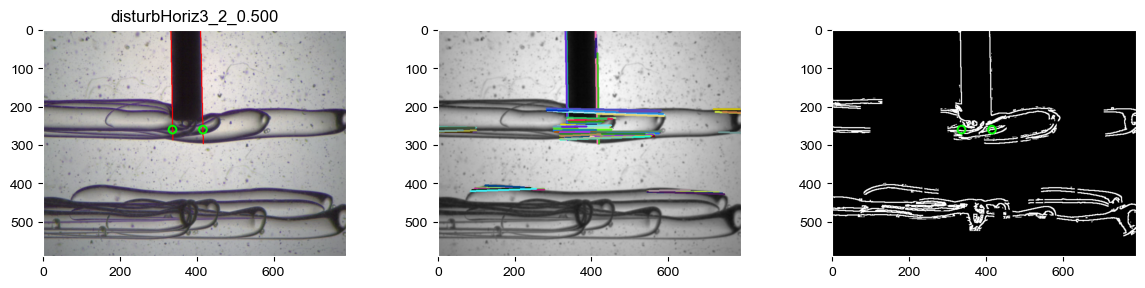

In [663]:
sw.detectNozzle(overwrite=True, diag=2, bgmode=0, modes=[4], frameGetMode=0)

In [664]:
sw.adjustNozzle()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_3_0.750\disturbHoriz3_3_0.750_background_I_SO7-S20-0.5_S_4.00_230509_184700_6.png


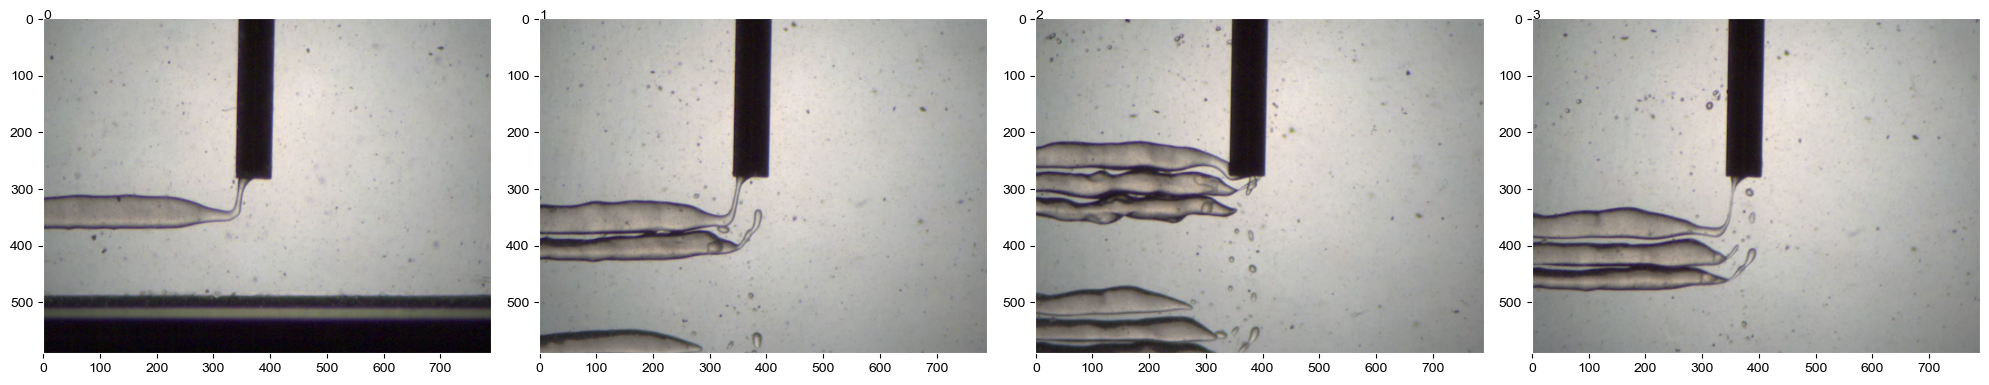

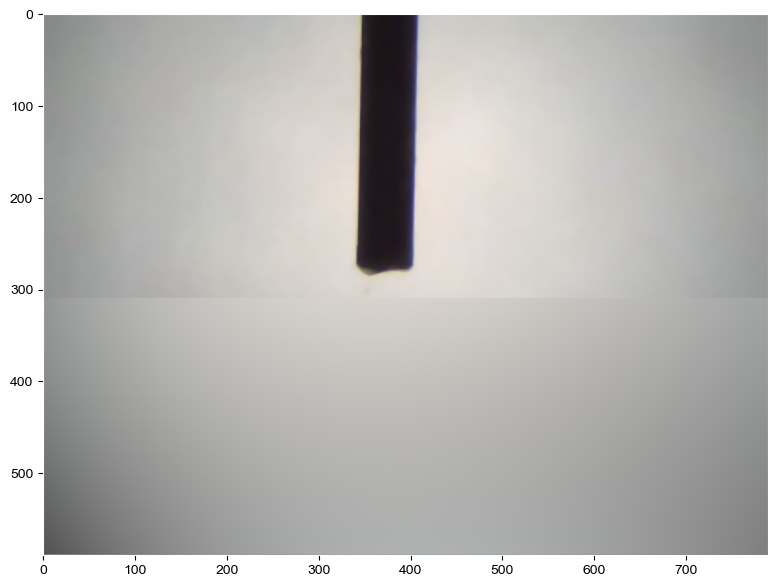

In [492]:
sw.exportBackground(overwrite=True, diag=2, ymin=10, curveFit=True, numpics=4, mode=2)

In [618]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, overrideSegment=True, overwriteCropLocs=True, useML=False)

INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1o1_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1o2_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1o3_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1o4_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1o5_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1o6_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1o7_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1o8_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1p1_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Exported disturbHoriz3_1_0.875_Usegment_HOh1_l0d1p2_I_SO7-S20-0.5_S_4.00_230509_172108_0.png
INFO: Expo

In [671]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_4.00\I_PDMSS10_S_4.00_230822\disturbHoriz3_2_0.500\disturbHoriz3_2_0.500_failures_I_PDMSS10_S_4.00_230822_101147_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_4.00\I_PDMSS10_S_4.00_230822\disturbHoriz3_2_0.500\disturbHoriz3_2_0.500_measure_I_PDMSS10_S_4.00_230822_101147_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_4.00\I_PDMSS10_S_4.00_230822\disturbHoriz3_2_0.500\disturbHoriz3_2_0.500_summary_I_PDMSS10_S_4.00_230822_101147_1.csv


In [672]:
sw.showFailures()

,file,error
0,successes,
1,l3w1p1,white


,line,usedML


In [673]:
sw.approve()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_4.00\I_PDMSS10_S_4.00_230822\disturbHoriz3_2_0.500\disturbHoriz3_2_0.500_failures_I_PDMSS10_S_4.00_230822_101147_1.csv


disturbHoriz3_3_0.750_vstill_HOh3_l3w1p1_I_SO7-S20-0.5_S_4.00_230509_184700_6.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_3_0.750\disturbHoriz3_3_0.750_cropLocs_I_SO7-S20-0.5_S_4.00_230509_184700_6.csv
INFO: Exported disturbHoriz3_3_0.750_Usegment_HOh3_l3w1p1_I_SO7-S20-0.5_S_4.00_230509_184700_6.png


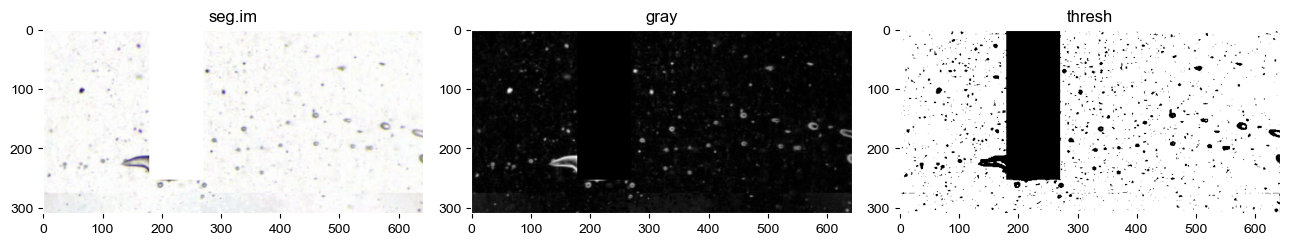

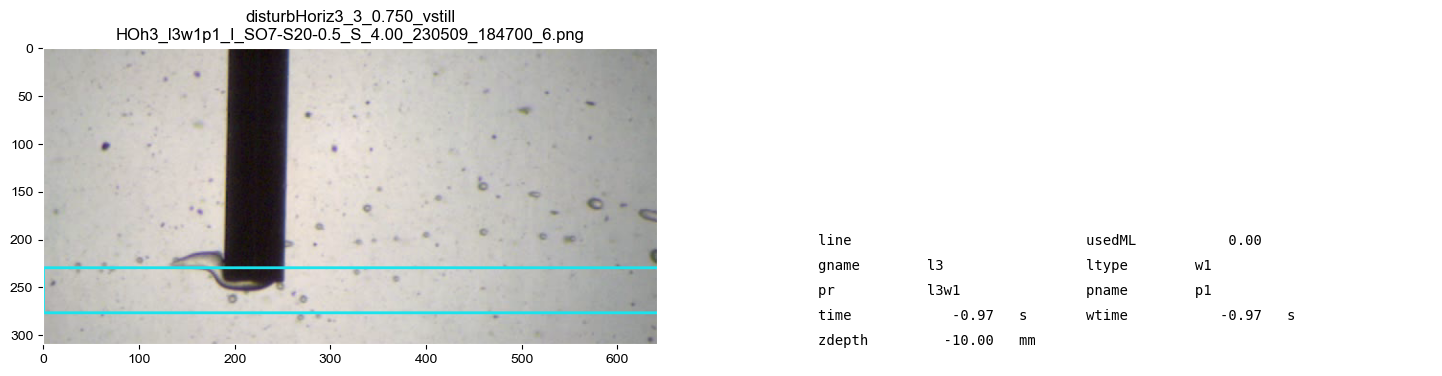

In [574]:
newcl = False
sw.testFailure(4, diag=1,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

INFO: Exported disturbHoriz3_2_0.500_Usegment_HOh2_l3w1p1_I_PDMSS10_S_4.00_230822_101147_1.png


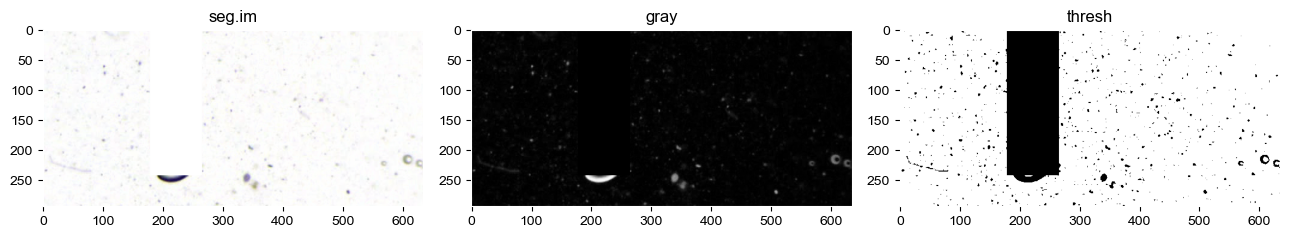

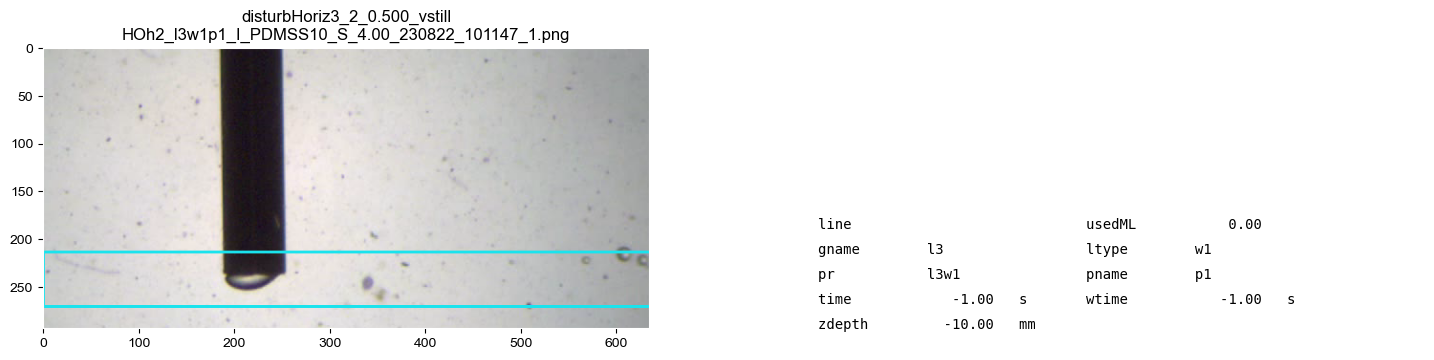

In [669]:
newcl = False
sw.testImage('l3w1p1', diag=1,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

In [653]:
sw.openLastImage()

In [616]:
sw.openLastSeries()

In [115]:
sw.whiteOutFiles(canMatch=['_l1'])

INFO: Whited out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\disturbVert2_2_0.500_vstill_V2_l1d2o1_I_PDMSS8-S85-0.05_S_3.50_230818_131009_5.png
INFO: Blacked out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\Usegment\disturbVert2_2_0.500_Usegment_V2_l1d2o1_I_PDMSS8-S85-0.05_S_3.50_230818_131009_5.png
INFO: Whited out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\disturbVert2_2_0.500_vstill_V2_l1d2o2_I_PDMSS8-S85-0.05_S_3.50_230818_131009_5.png
INFO: Blacked out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\Usegment\disturbVert2_2_0.500_Usegment_V2_l1d2o2_I_PDMSS8-S85-0.05_S_3.50_230818_131009_5.png
INFO: Whited out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\disturbVert2_2_0.500_vstill_V2_l1d2o3_I_PDMSS8-S85-0.05_S_3.50_230818